In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib as mlb

mlb.style.use('fivethirtyeight');

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

from wordcloud import WordCloud, STOPWORDS

import missingno as msno

In [2]:
medals = pd.read_csv('Tokyo Medals 2021.csv')

#Reading Dataset2
gender = pd.read_excel('EntriesGender.xlsx')
athletes = pd.read_excel('Athletes.xlsx')
teams = pd.read_excel('Teams.xlsx')
coaches = pd.read_excel('Coaches.xlsx')

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
medals.head(10).sort_values(by="Rank By Total",
                        ascending=True).style.set_properties(**{'background-color': '#F0F0F0',
                                    'color': '#222222',
                                    'border': '1.5px  solid black'}).bar(color='#FEC63D', 
                                                                         vmin=100_000, 
                                                                         subset=['Gold Medal']).bar(color='#C2C2C2', 
                                                                                                    vmin=100_000, 
                                                                                                    subset=['Silver Medal']).bar(color='#CE6A2E', 
                                                                                                                                    vmin=100_000, 
                                                                                                                                    subset=['Bronze Medal'])

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
4,ROC,20,28,23,71,3
3,Great Britain,22,21,22,65,4
2,Japan,27,14,17,58,5
5,Australia,17,7,22,46,6
9,Italy,10,10,20,40,7
8,Germany,10,11,16,37,8
6,Netherlands,10,12,14,36,9
7,France,10,12,11,33,10


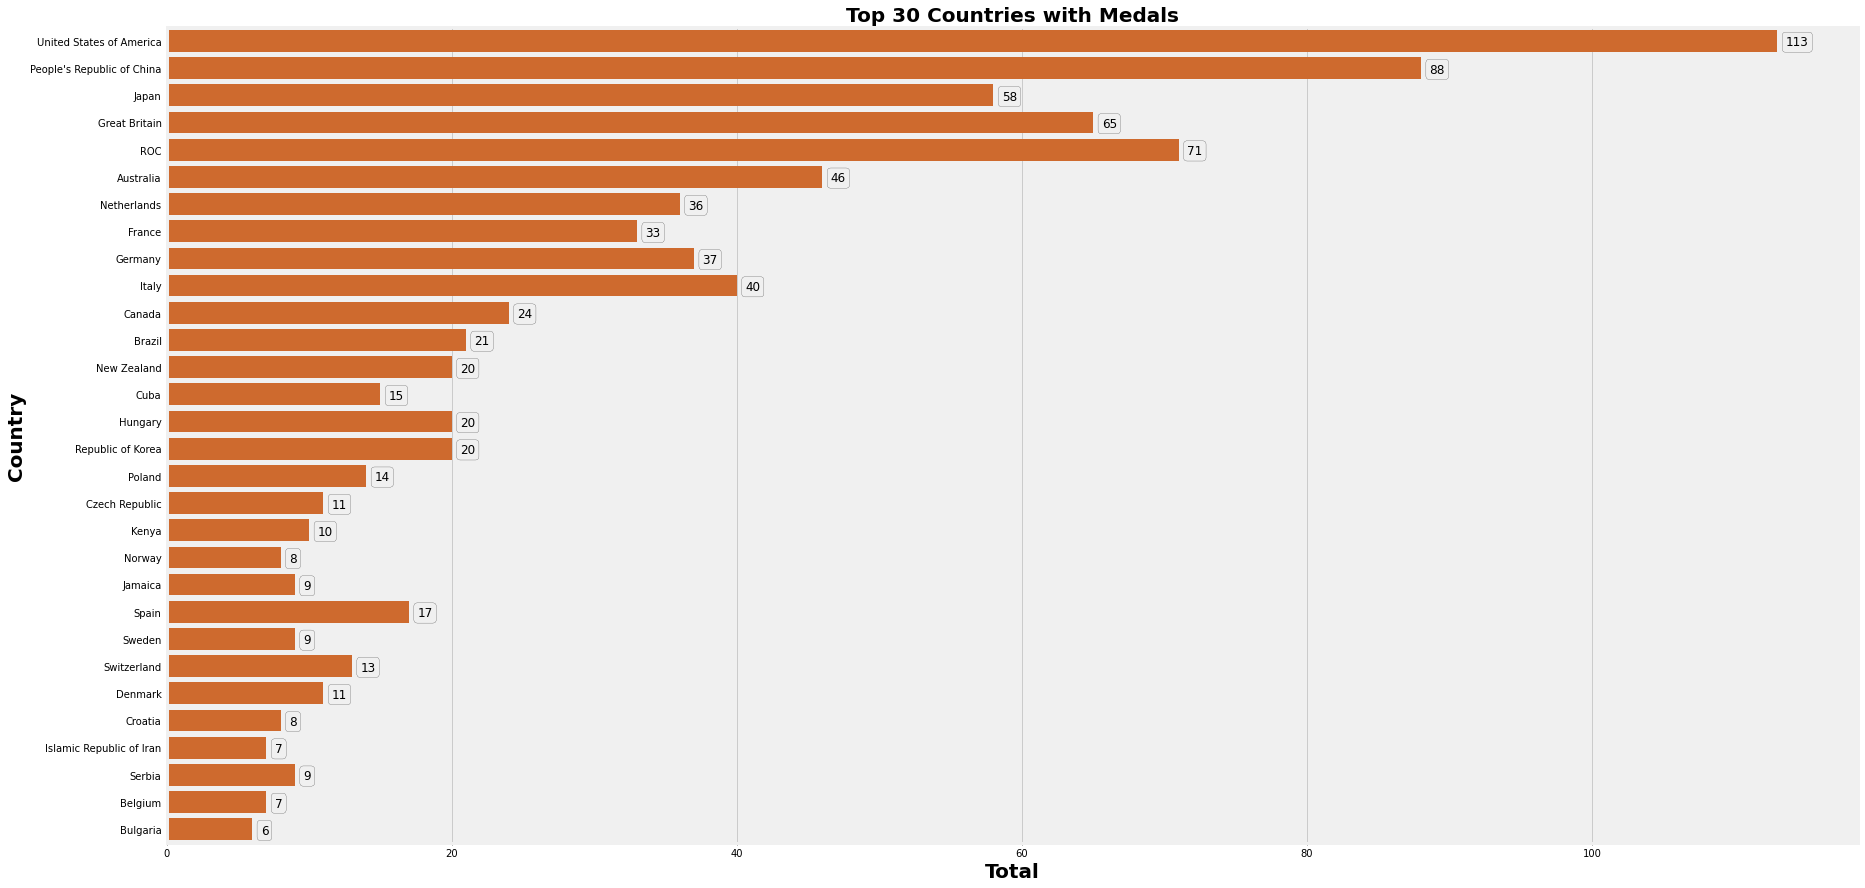

In [5]:
plt.figure(figsize=(27,15))
olympics_col = ["#F8B7CD","#67A3D9", "#C2C2C2", "#CE6A2E",  "#FEC63D", "#77AB43",]
ax = sns.barplot(y ='Country',
                 x='Total',
                 data=medals[:30],
                 color=olympics_col[3], 
                 zorder=2, 
                 linewidth=0, 
                 orient='h', 
                 saturation=1, 
                 alpha=1,
                 )

#Lables
ax.set_xlabel("Total",fontsize=20, weight='bold')
ax.set_ylabel("Country",fontsize=20, weight='bold')
ax.tick_params(labelsize=10, width=0.5, length=1.5)
plt.title("Top 30 Countries with Medals",size=20,weight='bold')  


 #Patches
for a in ax.patches:
    value = f'{a.get_width():.0f}'
    x = a.get_x() + a.get_width() + 0.60
    y = a.get_y() + a.get_height() / 1.8 
    ax.text(x, y, value, ha='left', va='center', fontsize=12, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))

  



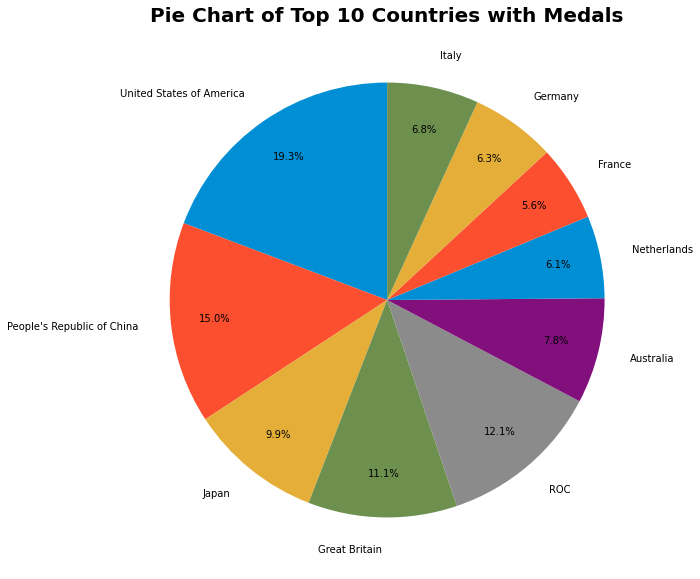

In [6]:
figure = plt.figure(figsize=(30,10))

A = plt.pie(medals['Total'][:10], 
        labels=medals['Country'][:10],
        startangle=90,
        labeldistance=1.15,
        pctdistance=0.8,
        autopct='%1.1f%%')



plt.title("Pie Chart of Top 10 Countries with Medals",size=20,weight='bold')
plt.show();

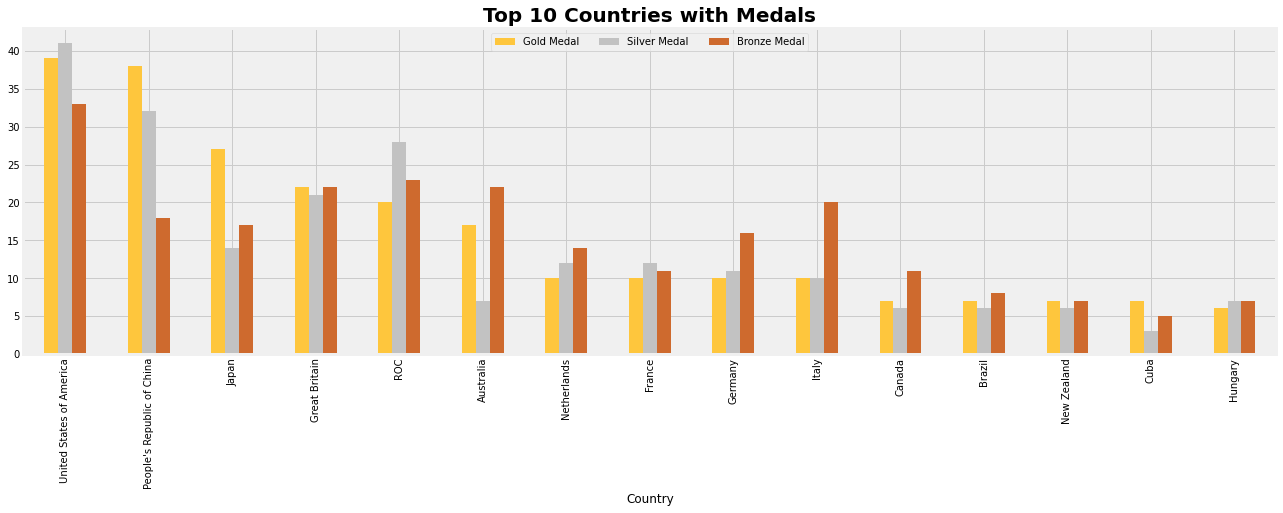

In [7]:
A = medals[:15].plot(kind="bar",
                   y =['Gold Medal','Silver Medal','Bronze Medal'],
                   x = 'Country',
                   figsize=(20,6),
                   color=['#FEC63D',
                          '#C2C2C2',
                          '#CE6A2E']).legend(loc='upper center',
                                             ncol=3);

plt.title("Top 10 Countries with Medals",size=20,weight='bold') ;

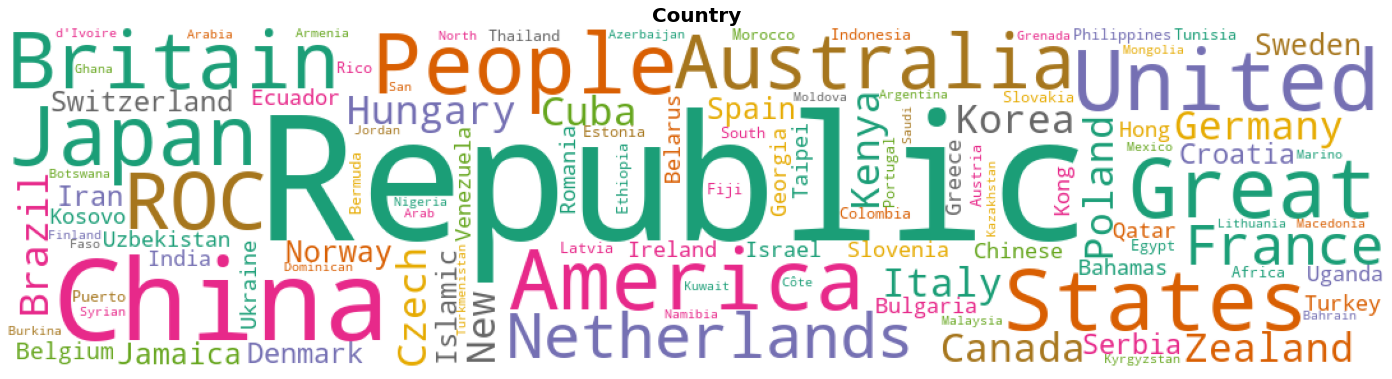

In [9]:
cloud = WordCloud(width=1080, 
                  height=270,
                  colormap = "Dark2",
                  background_color='white').generate(" ".join(medals['Country'].astype(str)))
plt.figure(figsize=(22, 10))
plt.imshow(cloud)
plt.title("Country",size=20,weight='bold') 
plt.axis('off');